## SOLUTION:

1) Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore",category = FutureWarning)

2) We have two seperate files for the train and test data. So we import both together and do the EDA on both simultaneoulsy.

In [2]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df2 = pd.read_csv("test_data.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


3) We create another copy for the train and test data so that the original data is not changed. We will perform our analysis on the newly created objects.

In [4]:
# For Trainin Data
df_train = df1
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# For Testing Data
df_test = df2
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


4) No of columns

In [6]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We dont have the Dependent variable 'Loan_Status' in the testing data. We need to predict it for the testing data.

5) Data types for each columns

In [8]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

6) Shape of the Data

In [9]:
df_train.shape, df_test.shape

((614, 13), (367, 12))

#### 7) Univariate Analysis

a) 'Loan_Status'

In [10]:
df_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# To get the probabilities instead of a number, we use 'normalize = True.'
df_train["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

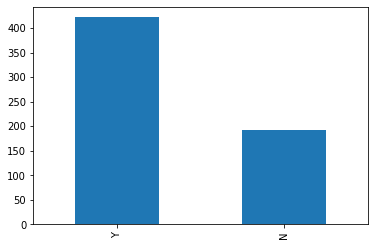

In [12]:
df_train["Loan_Status"].value_counts().plot.bar()

About 69% of the client's loan have been approved.

b) 'Gender'

In [13]:
df_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
df_train["Gender"].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

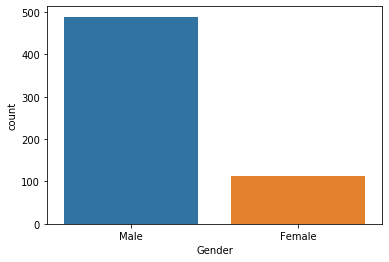

In [15]:
sns.countplot(x = "Gender", data = df_train)
plt.show()

About 81% of our applicants are Male.

c) 'Married'

In [16]:
df_train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df_train["Married"].value_counts(normalize = True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

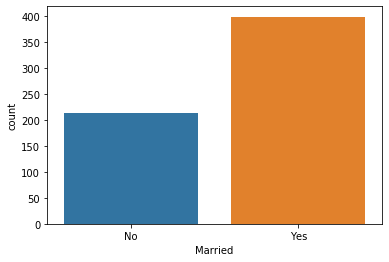

In [18]:
sns.countplot(x = "Married",data = df_train)
plt.show()

Approx 65% of the applicants are married.

d) 'Education'

In [19]:
df_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
df_train["Education"].value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

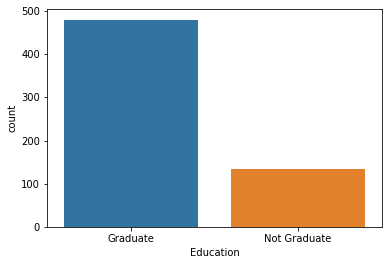

In [21]:
sns.countplot(x = "Education", data = df_train)
plt.show()

78% of the applicants have completed their Graduation. More the number of people who have completed the graduation, more are the chances of them repaying the Loan.

e) 'Self_Employed'

In [22]:
df_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
df_train["Self_Employed"].value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

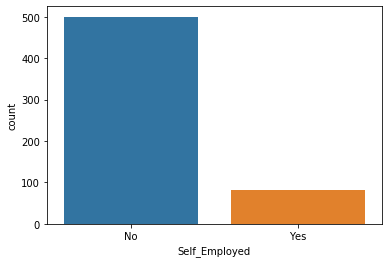

In [24]:
sns.countplot(x = "Self_Employed", data = df_train)
plt.show()

Only 14% of the applicants are SelF Employed. There are higher chances of repayment of Loan from these 14% as they are not dependent or less dependent on others.

f) 'Property_Area'

In [25]:
df_train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df_train["Property_Area"].value_counts(normalize = True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

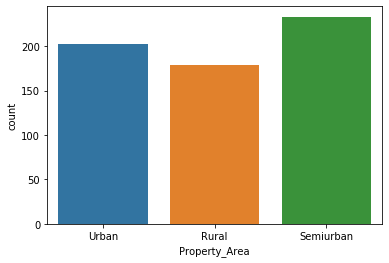

In [27]:
sns.countplot(x = "Property_Area", data = df_train)
plt.show()

38% of our applicants are from Semiurban. 32% are from urban. 29% are from rural.

g) 'Credit_History'.
[1 => Have repaid their previous debts.]
[0 => Have not repaid their previous debts]

In [28]:
df_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
df_train["Credit_History"].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

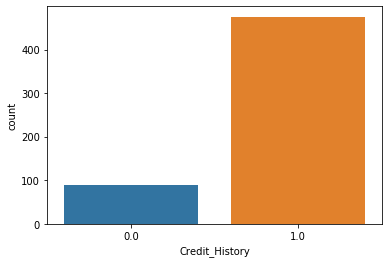

In [30]:
sns.countplot(x = "Credit_History", data = df_train)
plt.show()

Approx 84% of the applicants have repaid their previous loans. This means they have a higher chance of getting their loans approved.

h) 'Dependents'

In [31]:
df_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
df_train["Dependents"].value_counts(normalize = True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

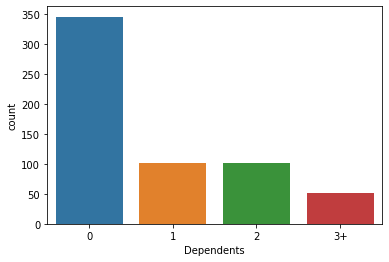

In [33]:
sns.countplot(x = "Dependents",data = df_train)
plt.show()

Approx 58% of the applicants have 0 dependents.

i) 'ApplicantIncome'

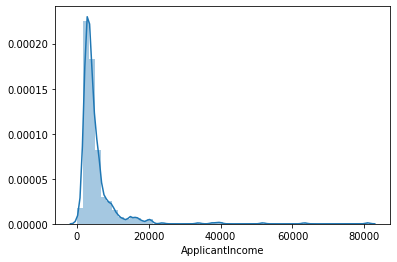

In [34]:
sns.distplot(df_train.ApplicantIncome)
plt.show()

We can see that most of the applicant's income is between 0 to 20000. We will normalize this data for better performance during the Scaling Part.

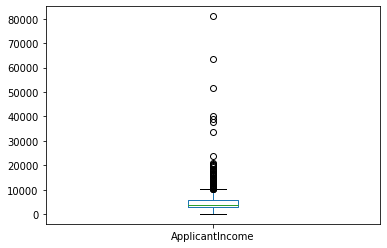

In [35]:
df_train["ApplicantIncome"].plot.box()
plt.show()

There are a lot of outliers in 'ApplicantIncome'. This may be due to the disparity of income across various regions or due to different levels of education.

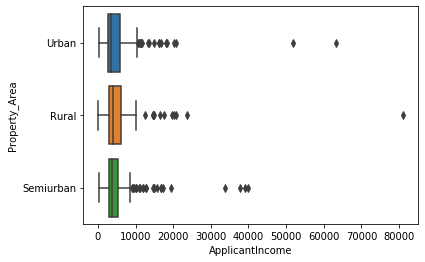

In [36]:
sns.boxplot(x = "ApplicantIncome", y = "Property_Area", data = df_train)
plt.show()

All the Property Area have outliers meaning they are not affecting the overall Applicant Income.

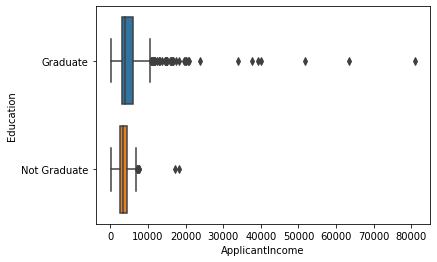

In [37]:
sns.boxplot(x = "ApplicantIncome", y = "Education", data = df_train)
plt.show()

There are more number of graduates who may have high income.

j) 'CoapplicantIncome'

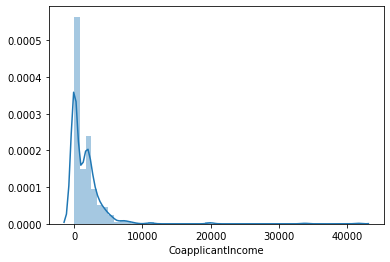

In [38]:
sns.distplot(df_train.CoapplicantIncome)
plt.show()

Majority of the applicant's income lies between 0 to 5000.
Here also, the distribution is similar to ApplicantIncome. 

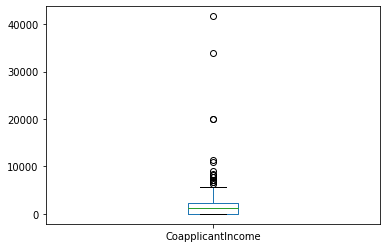

In [39]:
df_train["CoapplicantIncome"].plot.box()
plt.show()

There are lot of outliers. Also it is not normally distributed.

k) 'LoanAmount' (in Thousands)

In [40]:
#sns.distplot(df_train.LoanAmount)
#plt.show()

In [41]:
df_train["LoanAmount"].isnull().sum()

22

Since there are 22 Null values, we will impute them. For now we ignore the Null values for our visualization

In [42]:
dfa = df_train.dropna()

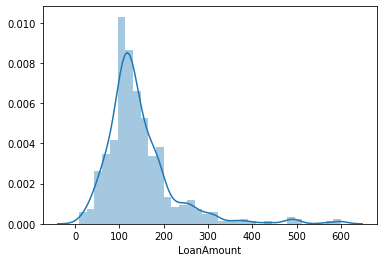

In [43]:
sns.distplot(dfa.LoanAmount)
plt.show()

Most of the Loan Amount ranges from 40000 to 200000

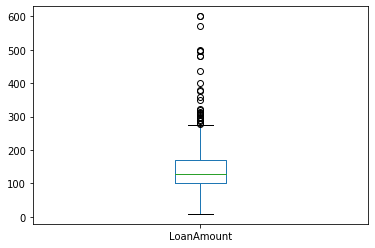

In [44]:
dfa["LoanAmount"].plot.box()
plt.show()

We will treat all the outliers together by normalizing the data.

#### 8) Bivariate Analysis

1) 'Gender'

In [45]:
pd.crosstab(df_train["Gender"],df_train["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


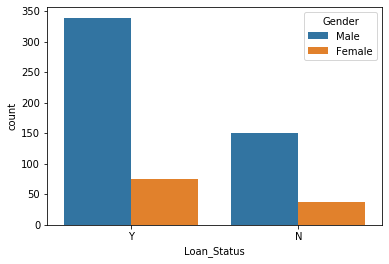

In [46]:
sns.countplot(x = "Loan_Status", hue = "Gender", data = df_train)
plt.show()

The proportion for male and female applicants for approved and unapproved loan is almost same (0.4)

b) 'Married'

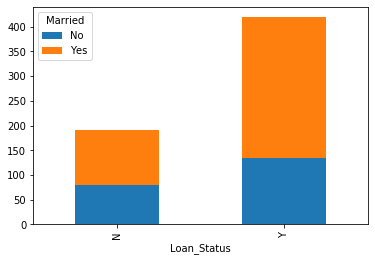

In [47]:
pd.crosstab(df_train["Loan_Status"],df_train["Married"]).plot(kind = "bar",stacked = True)

Out of the applicants whose Loan Status was approved, proportion of married applicants is higher.

c) 'Dependents'

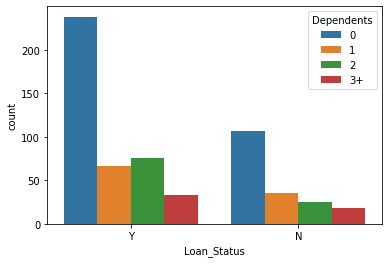

In [48]:
sns.countplot(x = "Loan_Status", hue = "Dependents", data = df_train)
plt.show()

Applicants with 0 dependents have higher chances of loan getting approved.

d) 'Education'

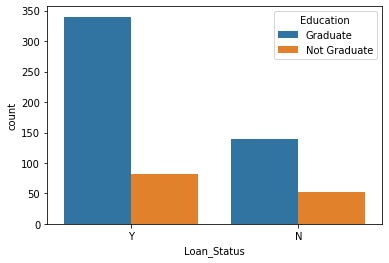

In [49]:
sns.countplot(x = "Loan_Status", hue = "Education", data = df_train)
plt.show()

Graduate people have a high chance of getting their loan approved.

e) 'Self Employed' and 'Loan Status'

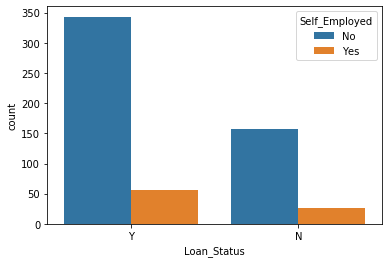

In [50]:
sns.countplot(x = "Loan_Status", hue = "Self_Employed", data = df_train)
plt.show()

Applicants who were Self Employed have a higher chance of getting their loan approved.

f) 'Credit History' and 'Loan Status'

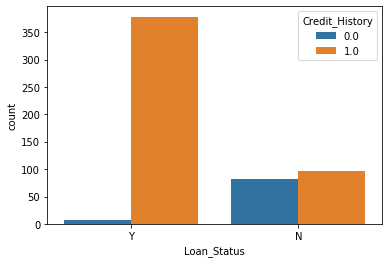

In [51]:
sns.countplot(x = "Loan_Status", hue = "Credit_History", data = df_train)
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

g) 'Property Area' and 'Loan Status'

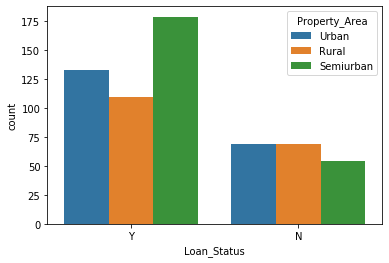

In [52]:
sns.countplot(x = "Loan_Status", hue = "Property_Area", data = df_train)
plt.show()

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

h) ['Total Income' = 'Applicant Income' + 'Coapplicant Income'] and 'Loan Status'

In [53]:
#pandas.cut
#Use cut when you need to segment and sort data values into bins.
#This function is also useful for going from a continuous variable to a categorical variable.
#For example, cut could convert ages to groups of age ranges.
#Supports binning into an equal number of bins, or a pre-specified array of bins.

Text(0, 0.5, 'Percentage')

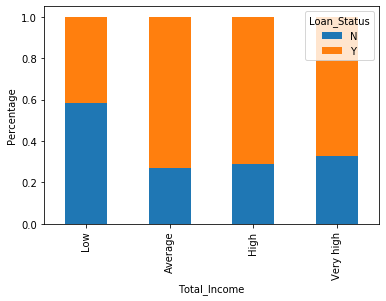

In [54]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')


If the income of the applicant is low, there are less chances of the loan getting approved.

i) 'Loan Amount' and 'Loan Status'

Text(0, 0.5, 'Percentage')

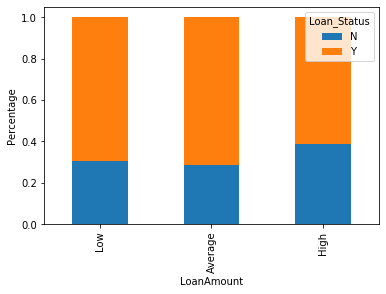

In [55]:
bins=[0,100,200,700]
group=['Low','Average','High']
df_train['LoanAmount_bin']=pd.cut(df_train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

#### 9) Encoding 'Dependents' and 'Loan_Status'

We will change the 3+ in dependents variable to 3 to make it a numerical variable

In [56]:
# For Training Data
df_train["Dependents"].replace("3+",3,inplace = True)

In [57]:
# For Testing Data
df_test["Dependents"].replace("3+",3,inplace = True)

We will also convert the target variable’s categories into 0 and 1

In [58]:
Loan_Status = {"Loan_Status":{"N":0,"Y":1}}
df_train.replace(Loan_Status,inplace = True)

We remove the column 'Total_income' as we dont need it now.

In [59]:
df_train = df_train.drop(["Total_Income"],axis = 1)

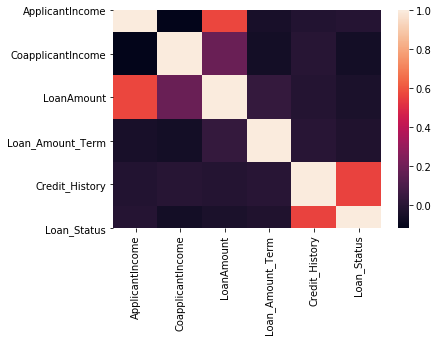

In [60]:
corr = df_train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

#### 10) Missing Value Imputation

In [61]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

For Categorical variables, we impute using mode. For Numerical, we impute using mean or median

In [62]:
df_train["Gender"].mode()

0    Male
dtype: object

In [63]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0],inplace = True)
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace = True)

df_train["Married"].fillna(df_train["Married"].mode()[0],inplace = True)
df_test["Married"].fillna(df_test["Married"].mode()[0],inplace = True)

df_train["Dependents"].fillna(df_train["Dependents"].mode()[0],inplace = True)
df_test["Dependents"].fillna(df_test["Dependents"].mode()[0],inplace = True)

df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0],inplace = True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace = True)

df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0],inplace = True)
df_test["Credit_History"].fillna(df_test["Credit_History"].mode()[0],inplace = True)

In [64]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

Imputing for 'Loan_Amount_Term'

In [65]:
df_train["Loan_Amount_Term"].value_counts()
#df_test["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Since the maximum term is 360, we impute the missing values with 360. The same is the case with Test Data

In [66]:
df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0],inplace = True)
df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode()[0],inplace = True)

Imputing for 'LoanAmount'

Since we saw in the Univariate analysis that 'LoanAmount' has a lot of outliers, we use Median to impute instead of mean

In [67]:
df_train["LoanAmount"].fillna(df_train["LoanAmount"].median(),inplace = True)
df_test["LoanAmount"].fillna(df_test["LoanAmount"].median(),inplace = True)

In [68]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

We drop the 'Total_income_bin' and 'LoanAmount_bin' as we created just for visualization

In [69]:
df_train = df_train.drop(["Total_Income_bin","LoanAmount_bin"],axis = 1)

In [70]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [71]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Loan_ID

We drop the 'Loan_ID' column from both Train and Test Data

In [72]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
df_train = df_train.drop(["Loan_ID"],axis=1)
df_test = df_test.drop(["Loan_ID"],axis=1)

#### We now have No Null values for both Training and Testing Data

#### 11) Categorical Variables Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()

In [75]:
df_train["Gender"] = l1.fit_transform(df_train.Gender)
df_test["Gender"] = l1.fit_transform(df_test.Gender)

df_train["Married"] = l1.fit_transform(df_train.Married)
df_test["Married"] = l1.fit_transform(df_test.Married)

df_train["Education"] = l1.fit_transform(df_train.Education)
df_test["Education"] = l1.fit_transform(df_test.Education)

df_train["Self_Employed"] = l1.fit_transform(df_train.Self_Employed)
df_test["Self_Employed"] = l1.fit_transform(df_test.Self_Employed)

For variable 'Property_Area', according to our analysis, people living in semiurban have more amount of applicants who have their loan approved. Therefore we give the Labels as { Rural-1, Urban -2, Semiurban-3}

In [76]:
Property_Area = {"Property_Area":{"Rural":1,"Urban":2,"Semiurban":3}}
df_train.replace(Property_Area,inplace = True)
df_test.replace(Property_Area,inplace = True)

In [77]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [78]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


'LoanAmount'

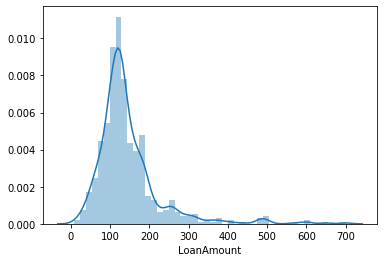

In [79]:
sns.distplot(df_train.LoanAmount)
plt.show()

We remove the skewness by doing the Log transformation.As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [80]:
df_train["LoanAmount_log"] = np.log(df_train["LoanAmount"])
df_test["LoanAmount_log"] = np.log(df_test["LoanAmount"])

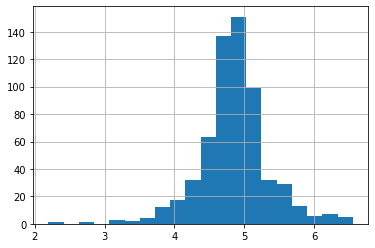

In [81]:
df_train["LoanAmount_log"].hist(bins=20)
plt.show()

In [82]:
df_train = df_train.drop(["LoanAmount"],axis=1)
df_test = df_test.drop(["LoanAmount"],axis=1)

In [83]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log'],
      dtype='object')

In [84]:
df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'LoanAmount_log'],
      dtype='object')

In [85]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,1,4.852030
1,1,1,1,0,0,4583,1508.0,360.0,1.0,1,0,4.852030
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,1,4.189655
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,1,4.787492
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,1,4.948760


## Train-Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train.drop("Loan_Status",axis=1),df_train["Loan_Status"],test_size = 0.3,random_state = 10)

### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(class_weight = "balanced")
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
print('classes: ',model1.classes_)
print('coefficients: ',model1.coef_)
print('intercept :',model1.intercept_)

classes:  [0 1]
coefficients:  [[-1.22545722e-01  5.67988526e-01  4.10669199e-02 -4.83527731e-01
  -7.97507985e-02  2.04040585e-05 -5.21820960e-05 -1.77051432e-03
   3.06257267e+00  4.59519115e-01 -3.63147455e-01]]
intercept : [-1.20876893]


In [89]:
pred1 = model1.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
print("Logistic Regression Accuracy: ",accuracy_score(pred1,y_test))

Logistic Regression Accuracy:  0.772972972972973


In [91]:
con_mat1 = confusion_matrix(y_test,pred1)
print("Logistic Regression Confusion Matrix: ")
print(con_mat1)

Logistic Regression Confusion Matrix: 
[[ 24  28]
 [ 14 119]]


In [92]:
report1 = classification_report(y_test,pred1)
print("Logistic Regression Classification Report: ")
print(report1)

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.46      0.53        52
           1       0.81      0.89      0.85       133

    accuracy                           0.77       185
   macro avg       0.72      0.68      0.69       185
weighted avg       0.76      0.77      0.76       185



## Support Vector Classifier

In [96]:
from sklearn.svm import SVC

In [97]:
svc = SVC()

In [98]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [99]:
pred1 = svc.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1,y_test)


0.7243243243243244

## Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt_model = DecisionTreeClassifier(random_state=10)

In [103]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [104]:
dt_pred = dt_model.predict(X_test)

In [105]:
print("Decision Tree Accuracy: ",accuracy_score(y_test,dt_pred))

Decision Tree Accuracy:  0.7135135135135136


In [106]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [107]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.813520,0.800000
1,2,0.815851,0.800000
2,3,0.825175,0.794595
3,4,0.832168,0.800000
4,5,0.839161,0.740541


No handles with labels found to put in legend.


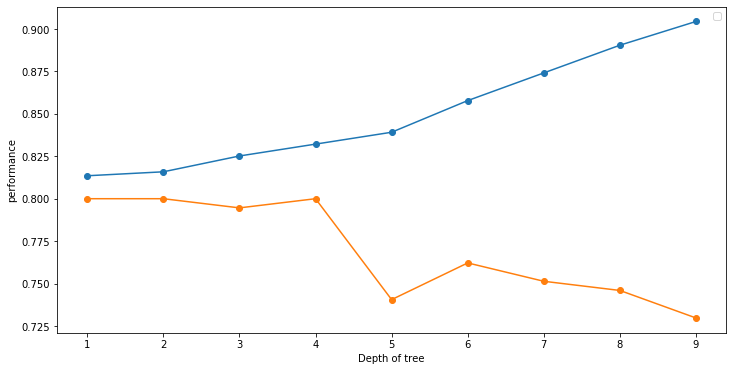

In [108]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

Since the Train and Test score is high at depth 4, we select max depth as 4

In [109]:
dt_model2 = DecisionTreeClassifier(max_depth=4,random_state=10)

In [110]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [111]:
dt_pred2 = dt_model2.predict(X_test)

In [112]:
print("Decision Tree Accuracy with max depth = 4: ",accuracy_score(y_test,dt_pred2))

Decision Tree Accuracy with max depth = 4:  0.8


## Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc = RandomForestClassifier(max_depth = 4,random_state=10)

In [115]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [116]:
rfc_pred = rfc.predict(X_test)

In [117]:
accuracy_score(y_test,rfc_pred)

0.8

## We get the highest accuracy using Decision Tree and Random Forest.